# Data Mining and Exploration [INFR11007]

## Python environment set-up
Part of the fist lab will be spent in setting-up a python working environvment. Follow the [instructions](https://github.com/sinziana91/DME/blob/master/environment-set-up.md) provided  and make sure your environment is set-up correctly. In case you run into trouble, please seek advice in the lab sessions.

## Lab 1: Data exploratory analysis and visualisations

In this lab we introduce the [landsat satellite](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29) dataset that we will be using throughout the course and  perform some exloratory data analysis and  visualisations on the dataset. 

### Landsat satellite dataset
#### Description
The database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood. The aim is to predict this classification, given the multi-spectral values. One frame of Landsat MSS imagery consists of four digital images of the same scene in different spectral bands. Two of  these are in the visible region (corresponding approximately to green and red regions of the visible spectrum) and two are in the (near) infra-red. Each pixel is an 8-bit binary word, with 0 corresponding to black and 255 to white. The spatial resolution of a pixel is about 80m x 80m. Each image contains 2340 x 3380 such pixels.

Our database is a (tiny) sub-area of a scene, consisting of 82 x 100 pixels. Each line of data corresponds to a 3x3 square neighbourhood of pixels completely contained within the 82x100 sub-area. Each line contains the pixel values in the four spectral bands (converted to ASCII) of each of the 9 pixels in the 3x3 neighbourhood and a number indicating the classification label of the central pixel. 

#### Classes
The number is a code for the following classes:

1. red soil
2. cotton crop
3. grey soil
4. damp grey soil
5. soil with vegetation stubble
6. mixture class (all types present)
7. very damp grey soil

*NB. There are no examples with class 6 in this dataset, hence there are actually 6 classes, i.e. 1,2,3,4,5 and 7.*

####  Data pre-processing
The data is given in random order and certain lines of data have been removed so that the original image cannot be reconstructed from this dataset.

In each line of data, the four spectral values for the top-left pixel are given first followed by the four spectral values for the top-middle pixel and then those for the top-right pixel, and so on with the pixels read out in sequence left-to-right and top-to-bottom. 

#### Number of examples
* training set:     4435
* test set:         2000

#### Number of attributes
36 (= 4 spectral bands x 9 pixels in neighbourhood )

#### Attributes
The attributes are numerical, in the range 0 to 255.

Execute the cell below to import the packages we will be using throughout this lab. The last line enforces the matplotlib figures to be rendered within the notebook.

In [ ]:
# Import required packages 
from __future__ import division, print_function
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Pandas
[Pandas](http://pandas.pydata.org) is a library for data manipulation and analysis. There are two fundamental data structures in pandas: the **Series** and **DataFrame** structures which are built on top of NumPy arrays. DataFrame structures are very similar to Data Frames used in the  R programming language.

Let's start by loading the  training and test datasets  into pandas DataFrames.

In [ ]:
train_path = os.path.join(os.getcwd(), 'datasets', 'landsat', 'landsat_train.csv')
test_path = os.path.join(os.getcwd(), 'datasets', 'landsat', 'landsat_test.csv')
landsat_train = pd.read_csv(train_path, delimiter = ',')
landsat_test = pd.read_csv(test_path, delimiter = ',')

### Preliminary inspections
We can use the `pandas` [`head()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) method to inspect the  first  `n` entries in the DataFrame. Note that the last column in the DataFrame contains the label for each data point.

In [ ]:
# Show first 5 instances of train set
landsat_train.head(n=5)

Alternatively, we can use the `pandas` [`sample()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) method to inspect  `n` random entries in the DataFrame. We can set the `random_state` parameter to ensure reproducible results. 

### ========== Question 1 ==========
Inspect 7 random entries in the test dataset. Set the `random_state` parameter to a number of your choice (i.e. `10`) to ensure reproducible results.

In [ ]:
landsat_train.sample(random_state=0, n=5)

### ========== Question 2 ==========

The `pandas` [`info()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html) method provides basic information (i.e. number of rows/columns, variable data types) about a DataFrame.

Display the basic information about the `landsat_train` dataframe. How many attributes/samples are there in the dataset?

In [ ]:
landsat_train.info()

*Your answer goes here*

There are  4435 entries and 37 columns in the  `landsat_train` dataframe.

Alternatively, we can use the `shape` attribute of a DataFrame to get the number of entries (i.e. rows/samples) and columns (i.e. attributes).

In [ ]:
print("There are {} entries and {} columns in the landsat_train DataFrame"\
      .format(landsat_train.shape[0], landsat_train.shape[1]))

Another very useful `pandas` method is [`describe()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) which  generates summary statistics about the columns in a DataFrame. 

In [ ]:
# Summary statistics in train set
landsat_train.describe()

Some times we might want to compute further statistics about the columns in a DataFrame. Since `pandas` structures are built on top of `numpy` arrays, each DataFrame is essentially a two-dimensional `numpy` array. Hence, we can use `numpy` or `scipy` functions to perform any sort of transformations or compute statistics. 
The next cell computes high-order statistics (i.e. [skewness](https://en.wikipedia.org/wiki/Skewness) and [kurtosis](https://en.wikipedia.org/wiki/Skewness)) by using functions imported from [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html).

In [ ]:
from scipy.stats import skew, kurtosis
print('Skewness:\n{}'.format(skew(landsat_train)))
print('Kurtosis:\n{}'.format(kurtosis(landsat_train)))

### Class labels
The class label names are stored in a separate file.  Let's load them in another DataFrame  called `landsat_labels` and inspect.

In [10]:
# Read classes and display
labels_path = os.path.join(os.getcwd(), 'datasets', 'landsat', 'landsat_classes.csv')
landsat_labels = pd.read_csv(labels_path, delimiter = ',', index_col=0)
landsat_labels

,Class
1,red soil
2,cotton crop
3,grey soil
4,damp grey soil
5,soil with vegetation stubble
6,mixture class (all types present)
7,very damp grey soil


`Pandas` provides the  [`to_dict()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_dict.html) method which can be used to transform  a DataFrame into a python dictionary. It will normally return a dictionary of dictionaries, one for each column in the DataFrame. Since we only have one column  in `landsat_labels`, we can use its name to access it and end up with a single dictionary.

In [11]:
# Turn the labels dataframe into a dictionary
# We only have one column in the DataFrame
landsat_labels_dict = landsat_labels.to_dict()["Class"]
landsat_labels_dict

{1: 'red soil',
 2: 'cotton crop',
 3: 'grey soil',
 4: 'damp grey soil',
 5: 'soil with vegetation stubble',
 6: 'mixture class (all types present)',
 7: 'very damp grey soil'}

### Seaborn

[Seaborn](https://seaborn.github.io/index.html) is a visualisation library built on top of matplotlib which offers some aesthetic enhancement and, more importantly, provides some high-level functions for  "exploring and understanding data". Seaborn is also tightly integrated with pandas and provides support for both numpy and pandas data structures.


### Visualising distributions
As a first visualising step, we want to get a feel for the distribution of the various features in the dataset. 

For this purpose, we can use the `seaborn` [`distplot()`](http://seaborn.pydata.org/generated/seaborn.distplot.html) function which combines a histogram with a kernel density estimate plot. Make sure  you read the [documentation](http://seaborn.pydata.org/generated/seaborn.distplot.html) of this function  to understand how it can be used.

We have a total of 36 features (9 pixels  $\times$ 4 spectral bands) and we will produce one `distplot` for each feature. 

Execute the cell below to visualise the univariate distributions and kernel density estimates. 

You should spend some time here to make sure you understand what each line of code does in this cell.

In [ ]:
fig, ax = plt.subplots(9,4, figsize=(17,17)) # Figure with 9 rows and 4 columns
pixels = np.arange(1,10) # Pixel values (1-9)
bands = np.arange(1,5) # Spectral band values (1-4)
for ii, pixel in enumerate(pixels):
    for jj, band in enumerate(bands):
        variable_name = 'pixel_' + str(pixel) + '_' + str(band) # Get the variable name of interest
        sns.distplot(landsat_train[variable_name], ax=ax[ii][jj], kde=True) # Use a single feature at a time
        ax[ii][jj].xaxis.label.set_visible(False)
[ax[0][ii].set_title("Band {}".format(band)) for ii, band in enumerate(bands)] # Set band titles for top plots
[ax[ii][0].set_ylabel("Pixel {}".format(pixel)) for ii, pixel in enumerate(pixels)] # Set pixel titles for left-most plots
fig.tight_layout()
plt.show()

### ========== Question 3 ==========
It seems like intensity distributions for the different pixels are similar within the same spectral band. Is this surprising? If not, explain why.

*Your answer goes here*



### ========== Question 4 ========== 

Given the observation made above, we now want to visualise the pixel intensity distributions by pooling all pixels together for each entry in the dataset. We still want to do this separately for each spectral band.

Modify the code provided above to produce a figure with 4 subplots (one for each spectral band), and within each subplot show the distribution and kernel density estimate for the pooled pixel intensity values. For each `distplot` set the number of bins equal to 25.

*Hint: the `distplot()` function accepts one-dimensional arrays. To be able to use it, you will need to transform the data. For this purpose, you might find  the [`reshape()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) numpy function useful.*

['pixel_1_1', 'pixel_2_1', 'pixel_3_1', 'pixel_4_1', 'pixel_5_1', 'pixel_6_1', 'pixel_7_1', 'pixel_8_1', 'pixel_9_1']
['pixel_1_2', 'pixel_2_2', 'pixel_3_2', 'pixel_4_2', 'pixel_5_2', 'pixel_6_2', 'pixel_7_2', 'pixel_8_2', 'pixel_9_2']
['pixel_1_3', 'pixel_2_3', 'pixel_3_3', 'pixel_4_3', 'pixel_5_3', 'pixel_6_3', 'pixel_7_3', 'pixel_8_3', 'pixel_9_3']
['pixel_1_4', 'pixel_2_4', 'pixel_3_4', 'pixel_4_4', 'pixel_5_4', 'pixel_6_4', 'pixel_7_4', 'pixel_8_4', 'pixel_9_4']


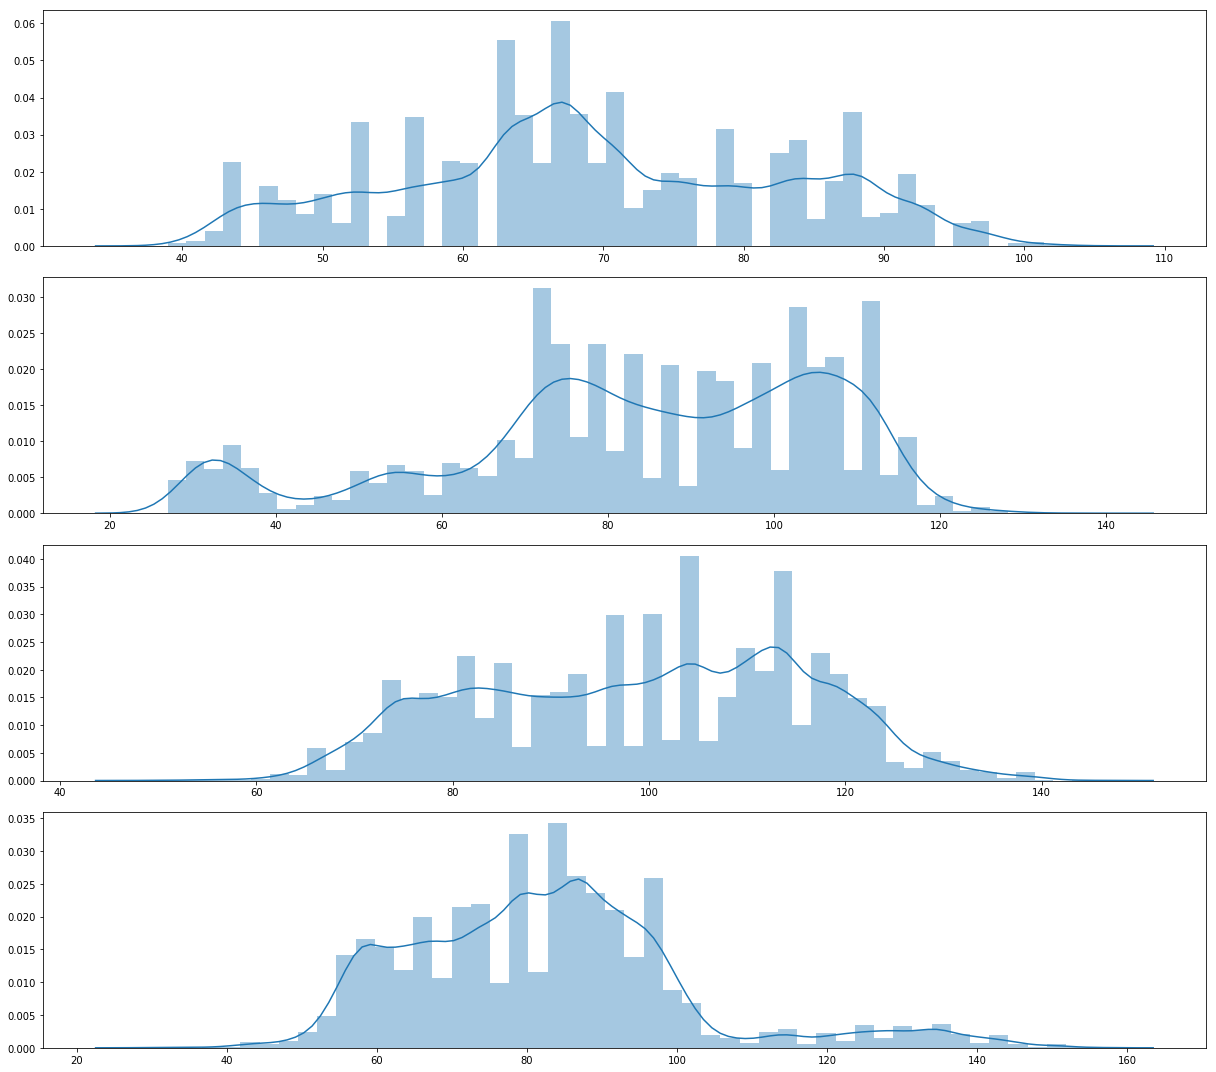

In [6]:
fig, ax = plt.subplots(4,1, figsize=(17,15)) # Figure with 9 rows and 4 columns
pixels = np.arange(1,10) # Pixel values (1-9)
bands = np.arange(1,5) # Spectral band values (1-4)
#for ii, pixel in enumerate(pixels):
for jj, band in enumerate(bands):
        variable_names = ['pixel_' + str(pixel) + '_' + str(band) for pixel in pixels] # Get the variable name of interest
        print(variable_names)
        sns.distplot(landsat_train[variable_names].values.reshape(-1,1), ax=ax[jj], kde=True) # Use a single feature at a time
        ax[jj].xaxis.label.set_visible(False)
#[ax[0][ii].set_title("Band {}".format(band)) for ii, band in enumerate(bands)] # Set band titles for top plots
#[ax[ii][0].set_ylabel("Pixel {}".format(pixel)) for ii, pixel in enumerate(pixels)] # Set pixel titles for left-most plots
fig.tight_layout()
plt.show()

Now, suppose we want to visualise the pooled pixel distributions separately for every spectral band, as well as for every class in the dataset. We can do this by filtering the data according to their corresponding label, one class at a time.

You are provided with sample code to achieve this. Once again, make sure you understand what every line of code does in the following cell.

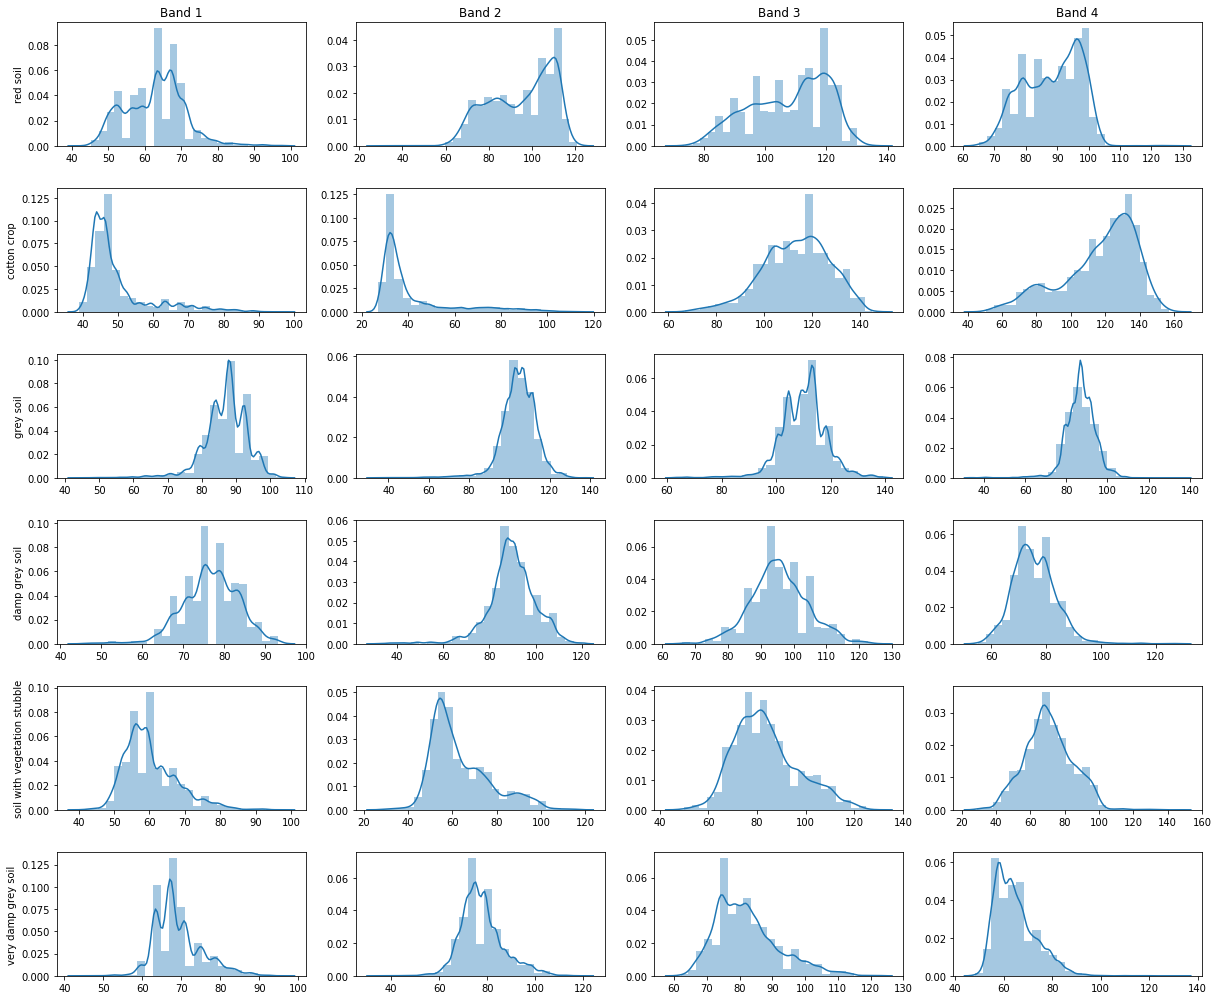

In [12]:
# Show distributions separately for each class and spectral band
labels = np.sort(landsat_train.label.unique()) # Get the labels in the dataset, by looking at possible values of "label" attribute
fig, ax = plt.subplots(labels.size,4, figsize=(17,14))
for ii, label in enumerate(labels):
    for jj, band in enumerate(bands):
        variable_names = ['pixel_' + str(pixel) + '_' + str(band) for pixel in pixels] # Pool pixels together
        sns.distplot(landsat_train[landsat_train["label"]==label][variable_names].values.reshape(-1,), \
                     ax=ax[ii][jj], kde=True, bins=25) # Filter by label
[ax[0][ii].set_title("Band {}".format(band)) for ii, band in enumerate(bands)] # Set band titles on top plots
[ax[ii][0].set_ylabel("{}".format(landsat_labels_dict[label])) for ii, label in enumerate(labels)] # Set label titles in left-most plots
fig.tight_layout()
plt.show()

It looks like the different classes can be discriminated by looking at the distribution of the pooled pixel intensities. This is good news, as it means that a classifier would hopefully be able to predict the right labels from pixel intensity values. 

In some cases we might want to plot the kernel density estimates for each class on top of one another to be able to *roughly* tell whether the classes are distinguishable. If we use the `distplot()` function as we have done so far, things might get a bit too messy. Instead, we can use `seaborn's` `kdeplot()` function which only plots the kernel density estimate of a variable. 

### ========== Question 5 ========== 
Produce a figure with four subplots (one for each spectral band) and within each subplot use the [`kdeplot()`](http://seaborn.pydata.org/generated/seaborn.kdeplot.html) function to show the kernel density estimate for the pooled pixel intensity values, separately for each class. Pay special attention in setting the legend(s) in your figure correctly.

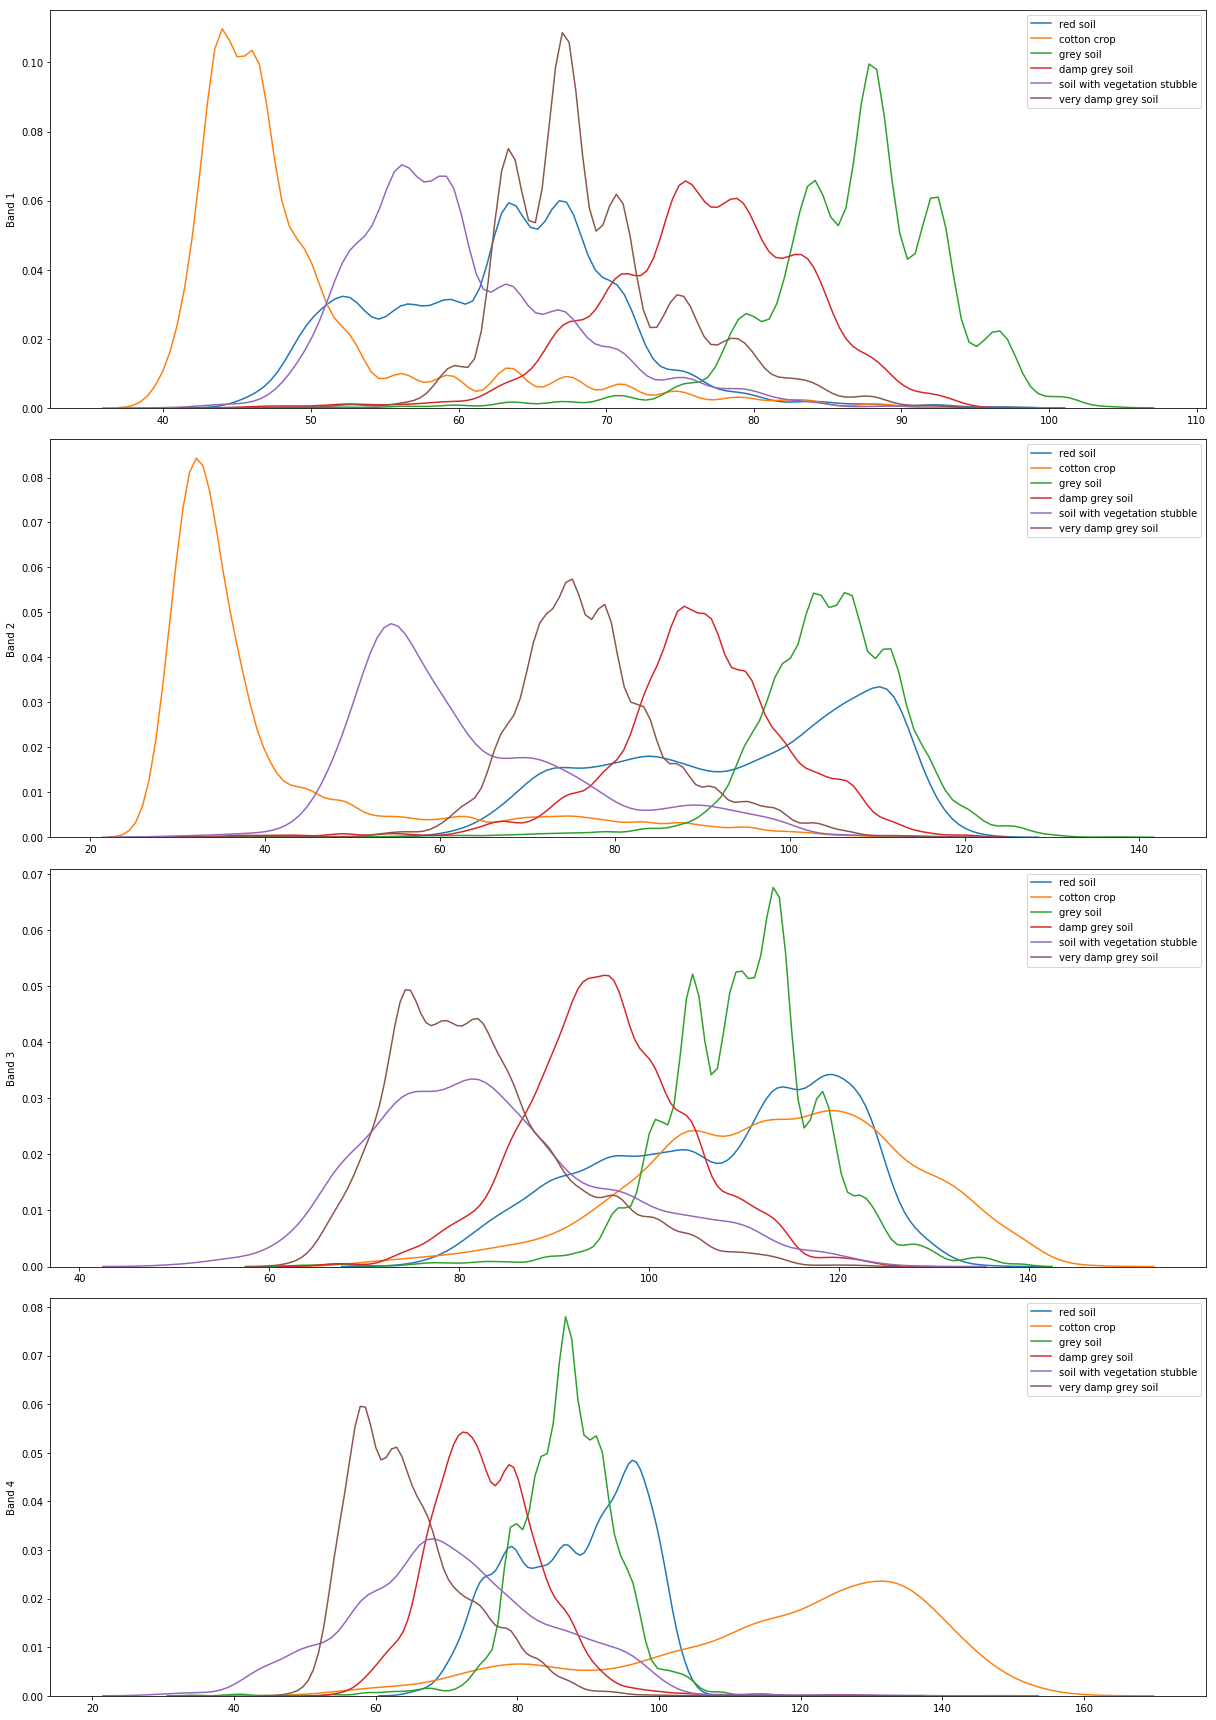

In [35]:
# Show distributions separately for each class and spectral band
labels = np.sort(landsat_train.label.unique()) # Get the labels in the dataset, by looking at possible values of "label" attribute
fig, ax = plt.subplots(4,1, figsize=(17,24))

for jj, band in enumerate(bands):
    for ii, label in enumerate(labels):
        variable_names = ['pixel_' + str(pixel) + '_' + str(band) for pixel in pixels] # Pool pixels together
        sns.kdeplot(landsat_train[landsat_train["label"]==label][variable_names].values.reshape(-1,), \
                     ax=ax[jj],label=landsat_labels_dict[label] ,legend=True) # Filter by label
    
#[ax[ii].set_title("Band {}".format(band)) for ii, band in enumerate(bands)] # Set band titles on top plots
[ax[ii].set_ylabel("Band {}".format(band)) for ii, band in enumerate(bands)] # Set label titles in left-most plots

fig.tight_layout()
plt.show()

### ========== Question 6 ========== 

By observing the above kernel density estimate plots, which classes do you think are easy/difficult to separate when using pixel intensity values only?

Only Cotton is easy. The rest will still be quite difficult

### Correlations

So far, we have focused on univariate feature distributions. Now, we want to get a feel for the correlations between different features. `Seaborn ` offers the `pairplot()` function, which is an excellent tool for visualising pair-wise relationships between variables.  

The following example  shows the  pairwise relationship between the features `pixel_1_1` and `pixel_1_2`. Refer to the [`pairplot`](http://seaborn.pydata.org/generated/seaborn.pairplot.html) documentation  to understand how this function can be used.  Feel free to experiment with other pairs of variables.

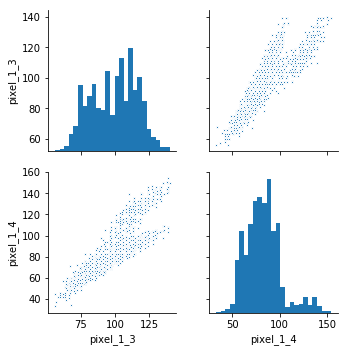

In [45]:
sns.pairplot(landsat_train, vars = ["pixel_1_3", "pixel_1_4"], \
             plot_kws={'s' : 5}, diag_kws={'bins' : 25}) # Set variables of interest, marker size and bins for histograms
plt.show()

The above plot shows the pair-wise relationship between only two variables. Our feature space is 36-dimensional, so if we wanted to repeat the same procedure for each possible pair of variables  we would end up with a 36 $\times$ 36 figure which would  not be very meaningful (also it would be fairly computationally expensive to produce). 

Instead, we can pool  pixels together again, as we did in the previous part. This time, instead of treating each pixel in the same way and combining all pixel values, we can compute the average pixel value in each spectral band.

The following bit of code  computes the average pixel value within each spectral band, separately  for  each observation, and saves the result in a new column.

In [46]:
for band in bands:
    variable_names = ['pixel_' + str(pixel) + '_' + str(band) for pixel in pixels]
    landsat_train['avg_' + str(band)] = landsat_train[variable_names].mean(axis=1)
landsat_train.head(5) # Show the first 5 observations in the updated dataframe

,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_3_1,pixel_3_2,...,pixel_8_4,pixel_9_1,pixel_9_2,pixel_9_3,pixel_9_4,label,avg_1,avg_2,avg_3,avg_4
0,92,115,120,94,84,102,106,79,84,102,...,100,84,107,113,87,3,90.111111,112.666667,117.555556,90.666667
1,84,102,106,79,84,102,102,83,80,102,...,87,84,99,104,79,3,84.888889,105.222222,109.000000,83.444444
2,84,102,102,83,80,102,102,79,84,94,...,79,84,99,104,79,3,83.555556,100.444444,104.333333,80.666667
3,80,102,102,79,84,94,102,79,80,94,...,79,84,103,104,79,3,82.222222,98.666667,102.888889,79.000000
4,84,94,102,79,80,94,98,76,80,102,...,79,79,107,109,87,3,80.777778,99.555556,103.888889,80.666667


### ========== Question 7 ========== 
By using the  `seaborn` `pairplot()` function, show the pairwise correlations between the mean pixel values in each spectral band for the training set (`landsat_train`). 

*Hint: make appropriate use of the `vars` argument of the function.*

Which spectral band pairs exhibit the strongest correlations?  Are these correlations expected?

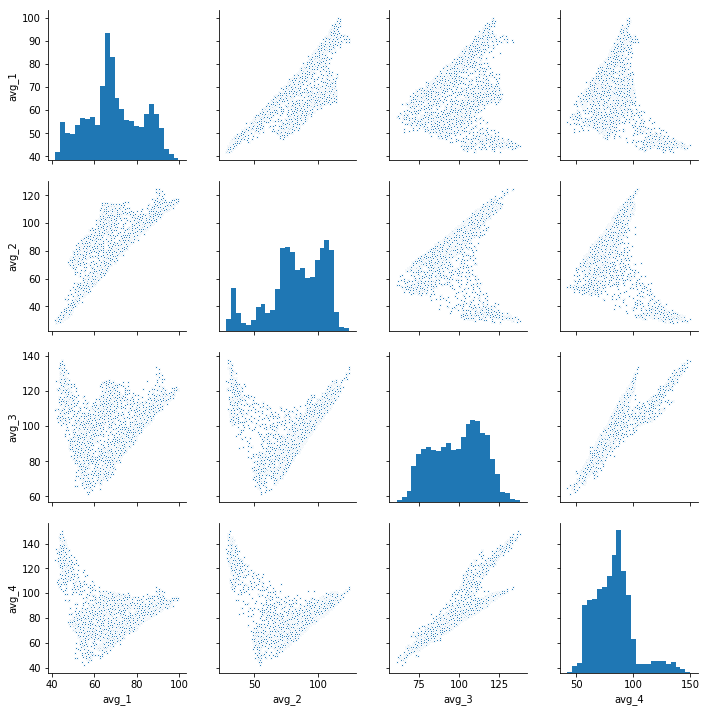

In [47]:
sns.pairplot(landsat_train, vars = ["avg_1", "avg_2","avg_3","avg_4"], \
             plot_kws={'s' : 5}, diag_kws={'bins' : 25}) # Set variables of interest, marker size and bins for histograms
plt.show()

1 and 2 & 3 and 4.
No this is not surprising since two of these are in the visible region (corresponding approximately to green and red regions of the visible spectrum) and two are in the (near) infra-red.

### ========== Question 8 ========== 
The `pairplot` function can also  be used to visualise pair-wise relationships between variables, conditioned on the label, that is, separately for each class.

Modify your code from the previous question to visualise pair-wise relationships between spectral bands, separately for each class. For the diagonal plots, show kernel density estimates instead of histograms  which are shown by default. Do not worry about changing the legend entries at this point.

*Hint: make appropriate use of the `hue` and `diag_kind` parameters of the [`pairplot`](http://seaborn.pydata.org/generated/seaborn.pairplot.html) function.*

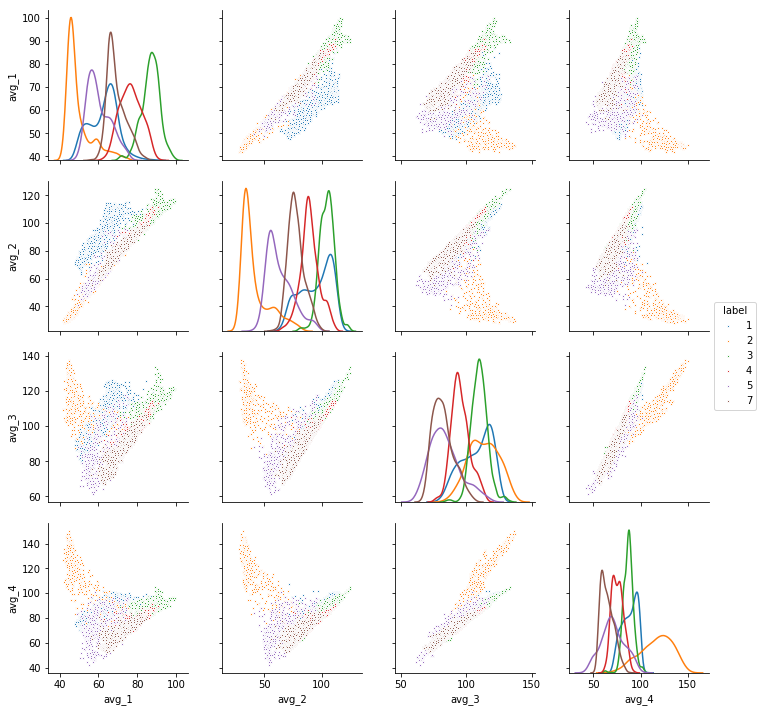

In [55]:
sns.pairplot(landsat_train, vars = ["avg_1", "avg_2","avg_3","avg_4"], \
             hue= "label",\
             diag_kind="kde",\
             plot_kws={'s' : 5}) # Set variables of interest, marker size and bins for histograms
plt.show()

### ========== Question 9 ========== 
Do you think that feature interactions can help in discrimanting the different classes? Would it make sense to use a classifier that makes use of such correlations to predict labels? For instance, would you expect a [Quadratic Discriminant Analysis (QDA)](https://en.wikipedia.org/wiki/Quadratic_classifier) classifier to perform better or worse than a [Gaussian Naive Bayes (GNB)](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes) model?

No those assume that the variables are 